In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv('data/Boston/result.csv')
print(data.shape)
data.head()

(3585, 68)


,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,250.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,...,0,1,1,0,0,1,1,0,0,1
1,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,...,0,1,1,0,0,1,1,0,0,1
2,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,...,1,1,1,0,0,1,1,0,0,1
3,75.0,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,...,1,1,1,0,0,1,1,0,0,1
4,79.0,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,...,0,1,1,0,0,0,0,0,0,1


### The variable of interest: price or price per accommodate?

Comments:
* The price has a right skewed distribution
* The are outliers that needs to be reviewed
* Price per accommodate seems a better variable of interest than just price 

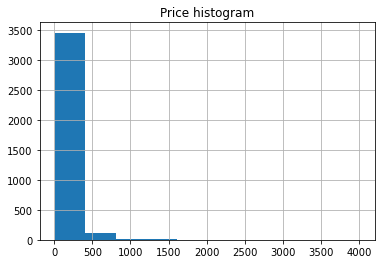

In [3]:
# price histogram
data['price'].hist()
plt.title('Price histogram')
plt.savefig('figures/price_hist.png')
plt.show()

In [4]:
# create the variable price per accommodate
data['ppa'] = data['price']/data['accommodates']

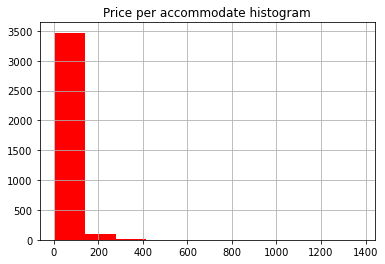

In [5]:
# price per accommodate histogram
data['ppa'].hist(color='red')
plt.title('Price per accommodate histogram')
plt.savefig('figures/ppa_hist.png')
plt.show()

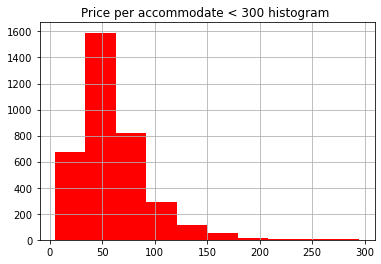

In [6]:
# price per accommodate histogram, considering only values under 300
data[data['ppa']<300]['ppa'].hist(color='red')
plt.title('Price per accommodate < 300 histogram ')
plt.savefig('figures/ppa_hist_under300.png')
plt.show()

### Numerical features

In [7]:
# select the numerical features
numerical = data.select_dtypes(include=['float64', 'int64'])
numerical = numerical[numerical.columns[2:17]]

In [8]:
# percentage of null values per column in numerical variables
null_numerical = pd.DataFrame(numerical.isnull().sum()/numerical.shape[0]).reset_index()
null_numerical.columns = ['numerical features', '% of null values']
null_numerical = null_numerical.sort_values(by='% of null values', ascending=False)
null_numerical = null_numerical.reset_index(drop=True)
null_numerical

,numerical features,% of null values
0,square_feet,0.984379
1,review_scores_accuracy,0.229568
2,review_scores_location,0.229289
3,review_scores_value,0.229010
4,review_scores_checkin,0.228731
5,review_scores_cleanliness,0.228173
6,review_scores_communication,0.228173
7,reviews_per_month,0.210879
8,host_response_rate,0.131381
9,host_acceptance_rate,0.131381


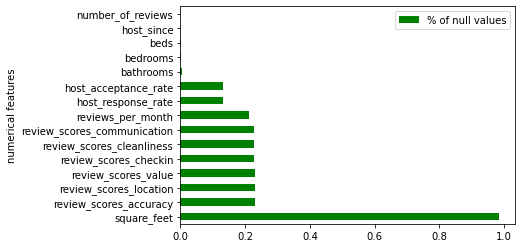

In [9]:
# plot % of null values in numercial variables
null_numerical.plot.barh(x='numerical features', y='% of null values', color='green')
plt.savefig('figures/null_numerical.png', bbox_inches='tight')
plt.show()

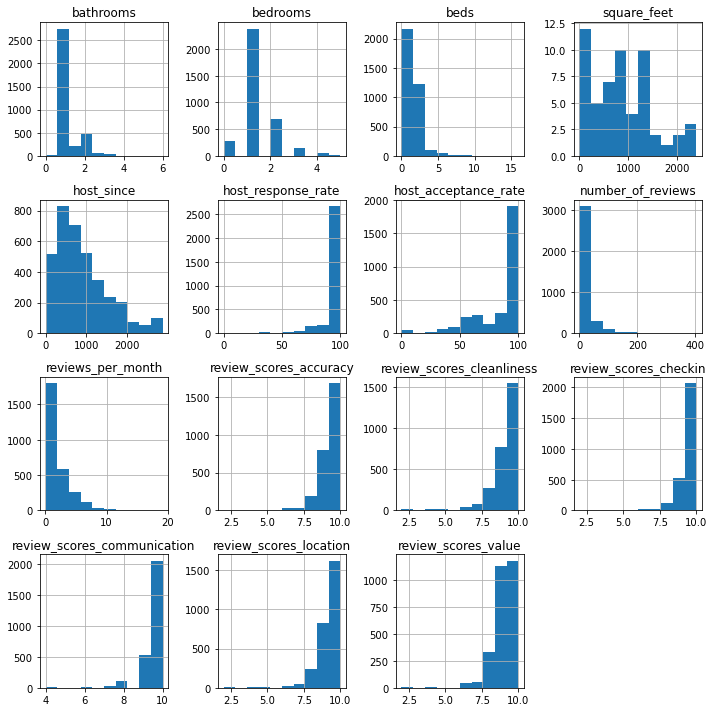

In [10]:
# histograms numerical variables
numerical.hist(figsize=(10, 10))
plt.tight_layout()
plt.savefig('figures/numerical_hist.png')

### Categorical features

In [11]:
# select categorical features
cat = data.select_dtypes(exclude=['float64', 'int64'])
cat.head()

,neighbourhood,property_type,room_type,bed_type,cancellation_policy,host_response_time,host_is_superhost,host_identity_verified
0,Roslindale,House,Entire home/apt,Real Bed,moderate,NaN,f,f
1,Roslindale,Apartment,Private room,Real Bed,moderate,within an hour,f,t
2,Roslindale,Apartment,Private room,Real Bed,moderate,within a few hours,t,t
3,Roslindale,House,Private room,Real Bed,moderate,within a few hours,f,f
4,Roslindale,House,Private room,Real Bed,flexible,within an hour,t,t


In [12]:
# calculate the percentage of null values per column un categorical features
cat_null = pd.DataFrame(cat.isnull().sum()/cat.shape[0]).reset_index()
cat_null.columns = ['categorical features', '% of null values']
cat_null = cat_null.sort_values(by='% of null values', ascending=False)
cat_null = cat_null.reset_index(drop=True)
cat_null

,categorical features,% of null values
0,host_response_time,0.131381
1,property_type,0.000837
2,neighbourhood,0.000000
3,room_type,0.000000
4,bed_type,0.000000
5,cancellation_policy,0.000000
6,host_is_superhost,0.000000
7,host_identity_verified,0.000000


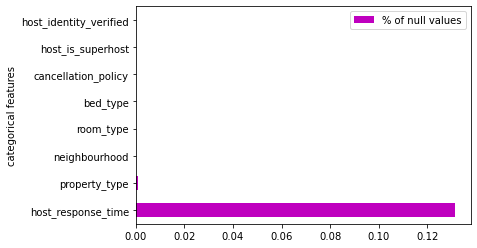

In [13]:
# plot of percentage of null values in categorical features
cat_null.plot.barh(x='categorical features', y='% of null values', color='m')
plt.savefig('figures/null_cat.png', bbox_inches='tight')
plt.show()

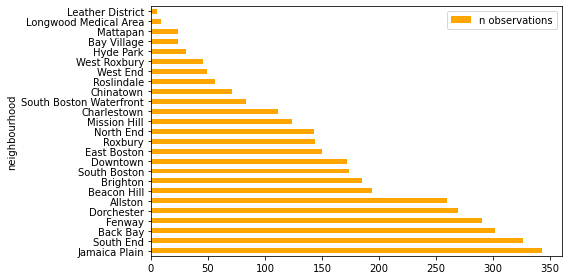

              neighbourhood  n observations
0             Jamaica Plain             343
1                 South End             326
2                  Back Bay             302
3                    Fenway             290
4                Dorchester             269
5                   Allston             260
6               Beacon Hill             194
7                  Brighton             185
8              South Boston             174
9                  Downtown             172
10              East Boston             150
11                  Roxbury             144
12                North End             143
13             Mission Hill             124
14              Charlestown             111
15  South Boston Waterfront              83
16                Chinatown              71
17               Roslindale              56
18                 West End              49
19             West Roxbury              46
20                Hyde Park              31
21              Bay Village     

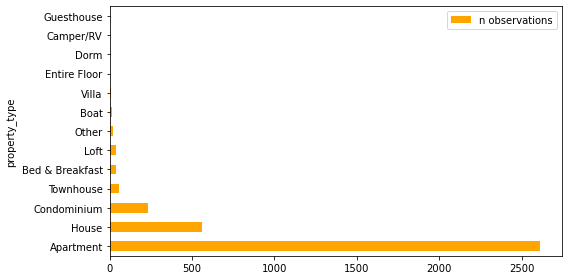

      property_type  n observations
0         Apartment            2612
1             House             562
2       Condominium             231
3         Townhouse              54
4   Bed & Breakfast              41
5              Loft              39
6             Other              17
7              Boat              12
8             Villa               6
9      Entire Floor               4
10             Dorm               2
11        Camper/RV               1
12       Guesthouse               1


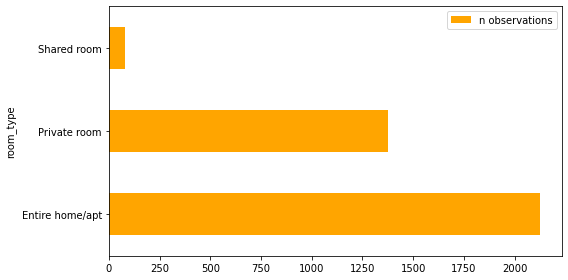

         room_type  n observations
0  Entire home/apt            2125
1     Private room            1377
2      Shared room              80


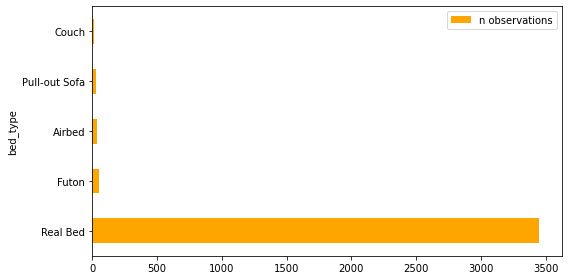

        bed_type  n observations
0       Real Bed            3450
1          Futon              51
2         Airbed              40
3  Pull-out Sofa              31
4          Couch              10


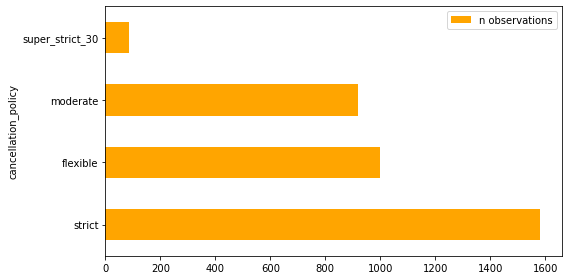

  cancellation_policy  n observations
0              strict            1580
1            flexible             999
2            moderate             918
3     super_strict_30              85


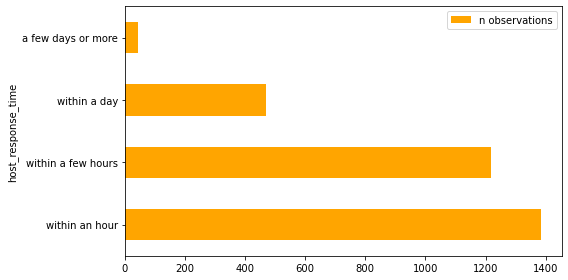

   host_response_time  n observations
0      within an hour            1384
1  within a few hours            1217
2        within a day             468
3  a few days or more              43


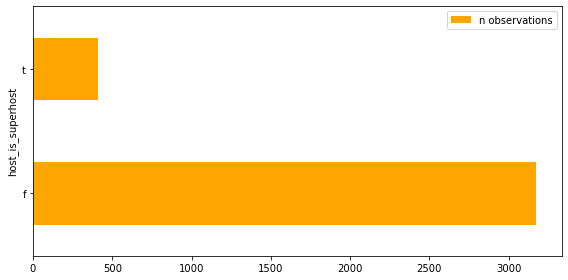

  host_is_superhost  n observations
0                 f            3175
1                 t             407


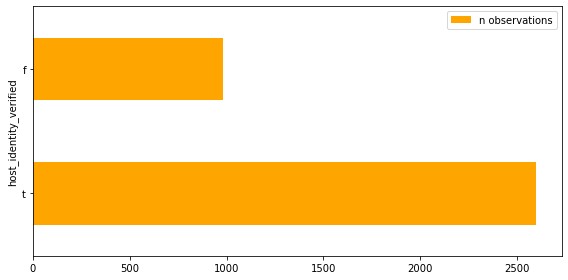

  host_identity_verified  n observations
0                      t            2601
1                      f             981


In [14]:
# plot of number of observations per category in categorical features
for col in cat.columns:
    group = cat.groupby(col).count()
    group = pd.DataFrame(group.iloc[:,1]).reset_index()
    group.columns = [col, 'n observations']
    group = group.sort_values(by='n observations', ascending=False)
    group = group.reset_index(drop=True)
    # plot
    group.plot.barh(x=col, y='n observations', color='orange', figsize=(8,4))
    plt.tight_layout()
    plt.savefig('figures/n_observations_'+col+'.png')
    plt.show()
    print(group)

### Amenities

In [15]:
# select amenities
amenities = data[data.columns[25:68]]
amenities.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
1,0,1,0,0,0,1,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1
3,0,1,1,0,0,1,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1
4,0,1,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [16]:
# no null values
amenities.isnull().sum().sum()

0

In [17]:
# number of properties with each amenities
amenities = pd.DataFrame(amenities.sum()).reset_index()
amenities.columns = ['amenities', 'n observations']
amenities['proportion'] = amenities['n observations'] / data.shape[0]
amenities = amenities.sort_values(by='n observations', ascending=False)
amenities = amenities.reset_index(drop=True)

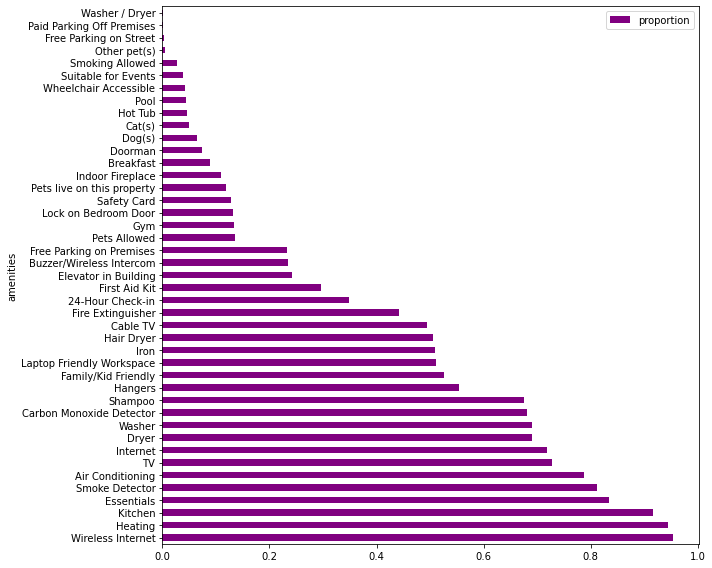

In [18]:
# plot
amenities.plot.barh(x='amenities', y='proportion', color='purple', figsize=(10,8))
plt.tight_layout()
plt.savefig('figures/amenities.png')
plt.show()

In [19]:
amenities

,amenities,n observations,proportion
0,Wireless Internet,3421,0.954254
1,Heating,3384,0.943933
2,Kitchen,3284,0.916039
3,Essentials,2994,0.835146
4,Smoke Detector,2911,0.811994
5,Air Conditioning,2821,0.786890
6,TV,2607,0.727197
7,Internet,2577,0.718828
8,Dryer,2476,0.690656
9,Washer,2475,0.690377
